# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report as cr,confusion_matrix as cm,accuracy_score as ac
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

## Get the Data
**Read the 'KNN_Project_Data csv file into a dataframe**

In [2]:
 df=pd.read_csv('KNN_Project_Data.csv')
 df.head()

XVPM         GWYH  ...         JHZC  TARGET CLASS
0  1636.670614   817.988525  ...   845.136088             0
1  1013.402760   577.587332  ...   861.081809             1
2  1300.035501   820.518697  ...  1647.186291             1
3  1059.347542  1066.866418  ...  1450.935357             0
4  1018.340526  1313.679056  ...  1899.850792             0

[5 rows x 11 columns]

**Check the head of the dataframe.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

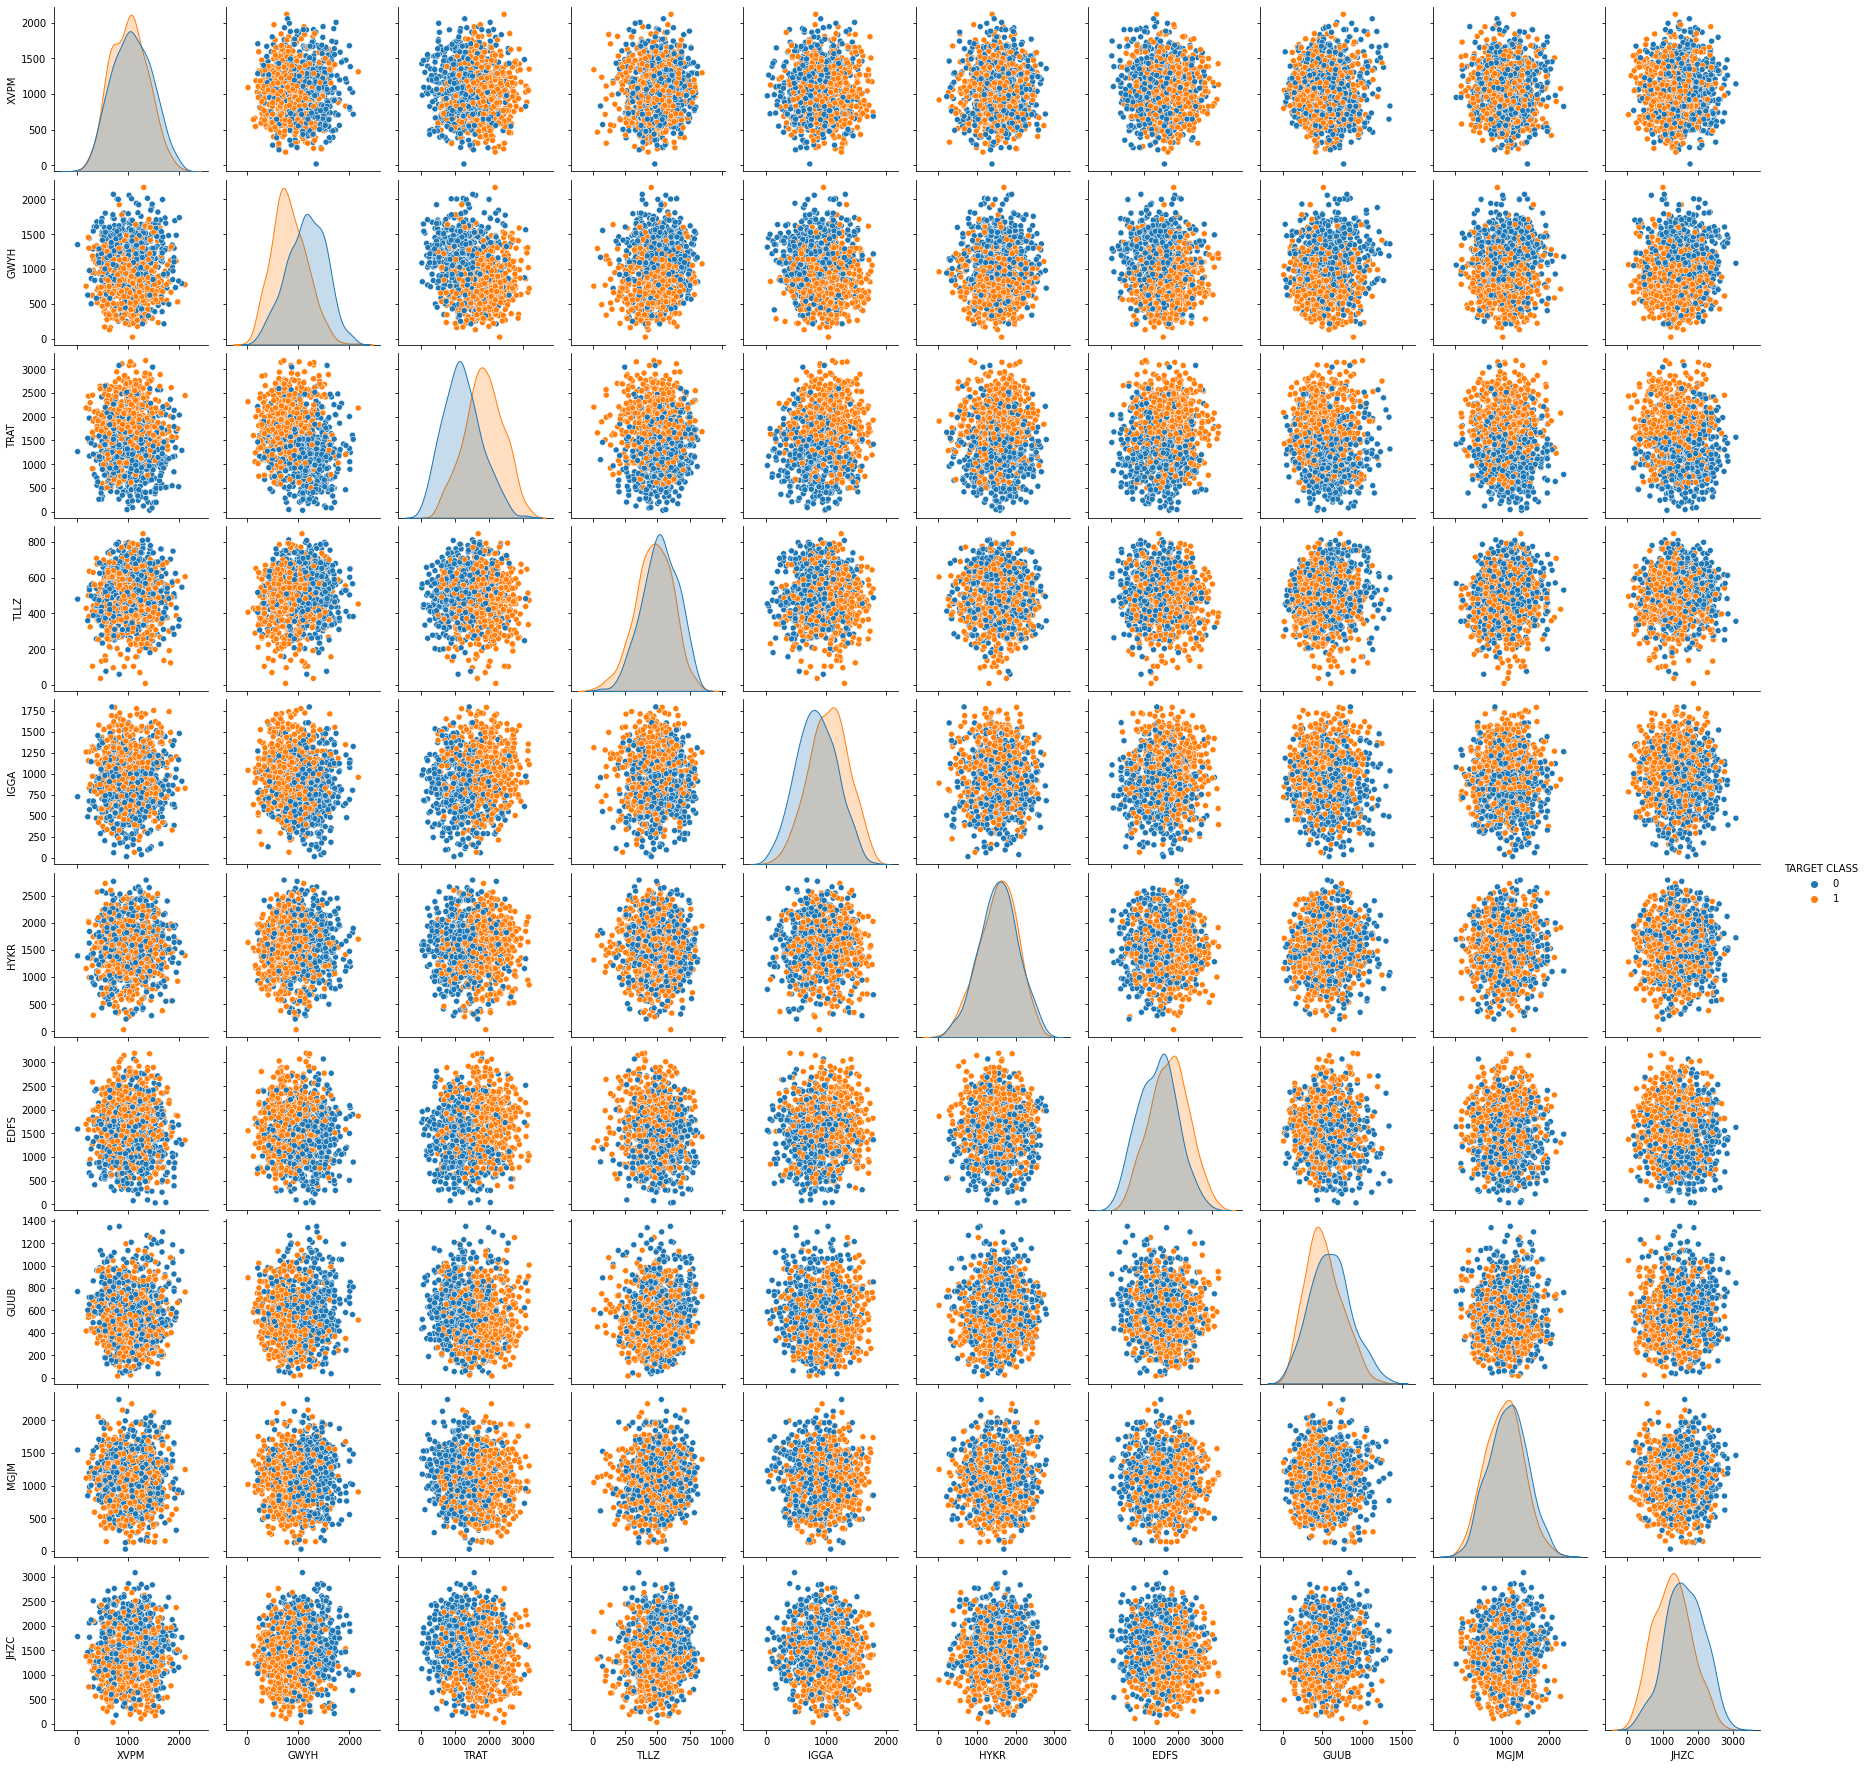

In [3]:
sns.pairplot(df,hue='TARGET CLASS')

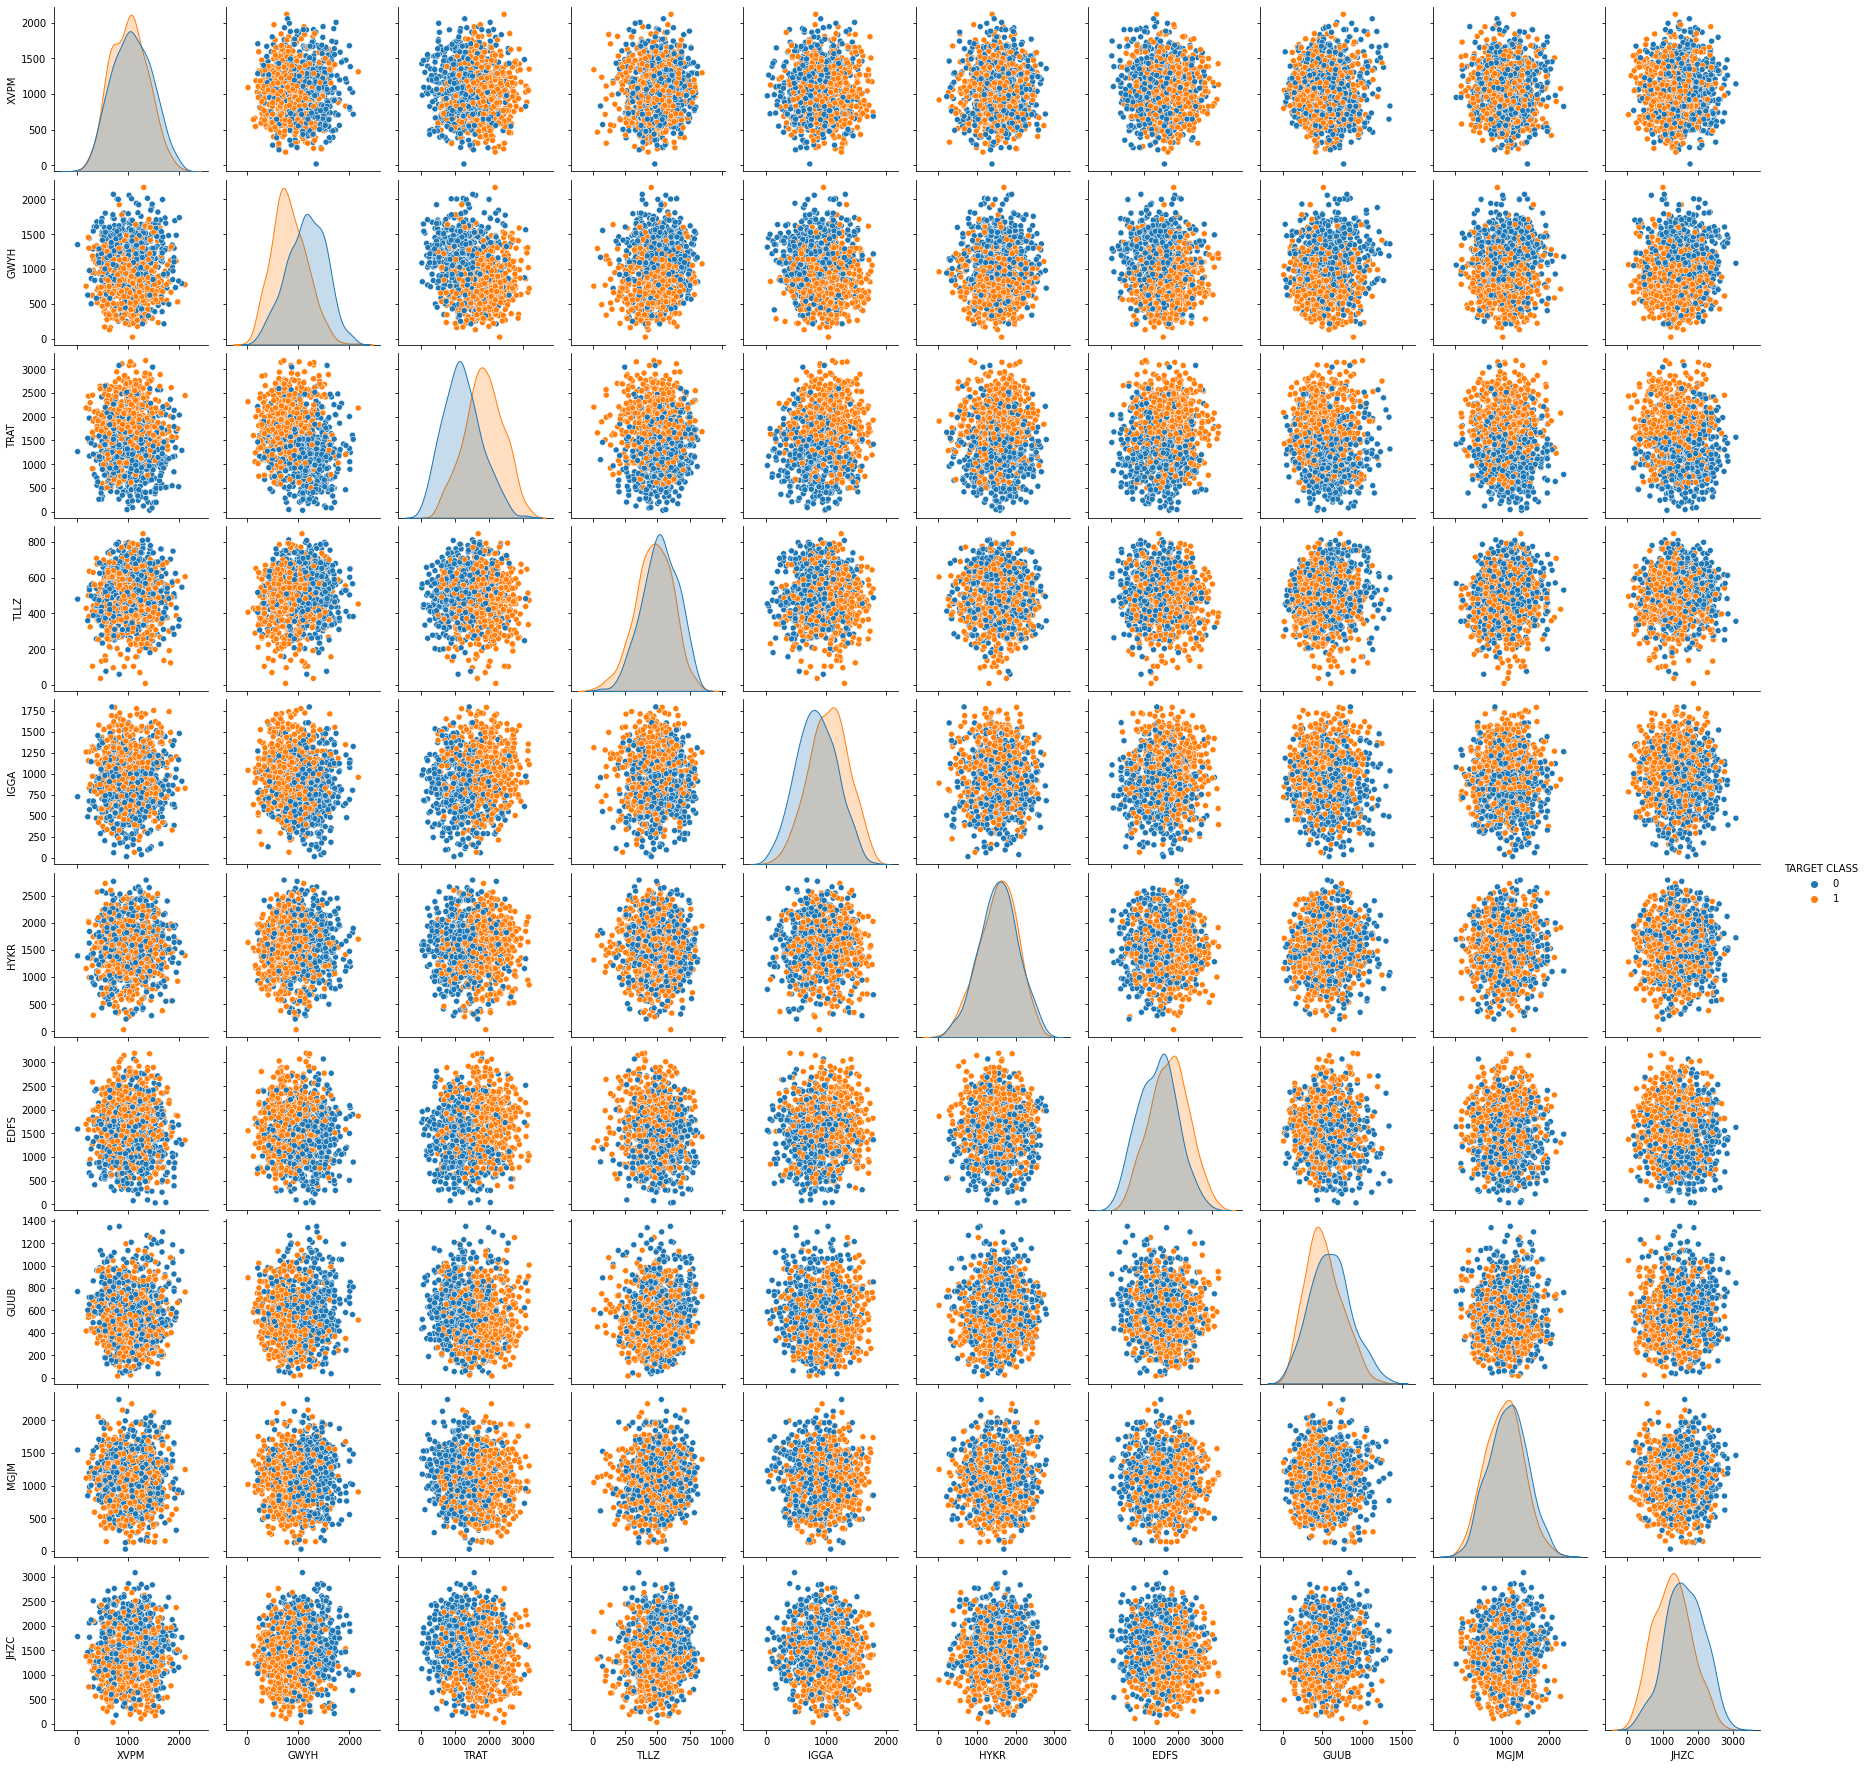

# Divide X & Y

In [5]:
 x=df.iloc[:,:-1]
 y=df.iloc[:,-1]

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [6]:
 sc=StandardScaler()
 sc.fit_transform(x)

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [53]:
 xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [54]:
 from sklearn.neighbors import KNeighborsClassifier


**Create a KNN model instance with n_neighbors=1**

In [55]:
 knn=KNeighborsClassifier(n_neighbors=1)


**Fit this KNN model to the training data.**

In [56]:
 knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and Xtest.**

In [57]:
 ypred=knn.predict(xtest)

**Create a confusion matrix , Accuracy and classification report.**

In [58]:
print(f'Confusion Matrix:-\n {cm(ytest,ypred)}')
print(f'Accuracy:- {ac(ytest,ypred)}')
print(f'Classification report{cr(ytest,ypred)}')

Confusion Matrix:-
 [[118  40]
 [ 41 101]]
Accuracy:- 0.73
Classification report              precision    recall  f1-score   support

           0       0.74      0.75      0.74       158
           1       0.72      0.71      0.71       142

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



Confusion Matrix:-
[[91 40]
 [25 94]]

Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       131
           1       0.70      0.79      0.74       119

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the accuracy for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [59]:
accuracy =[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred=knn.predict(xtest)
  Accu=ac(ytest,ypred)
  accuracy.append(Accu)




In [42]:
len(accuracy)

29

**Now create the following plot using the information from your for loop.**

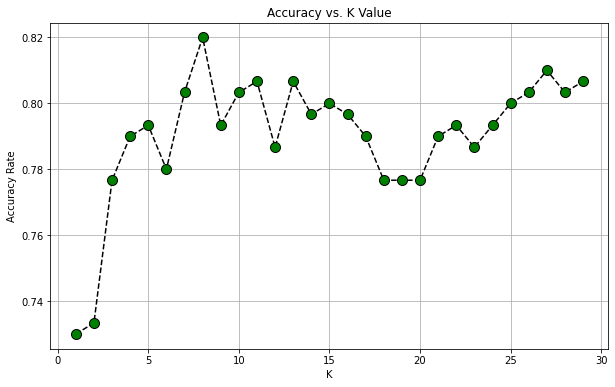

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), accuracy, color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)

plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

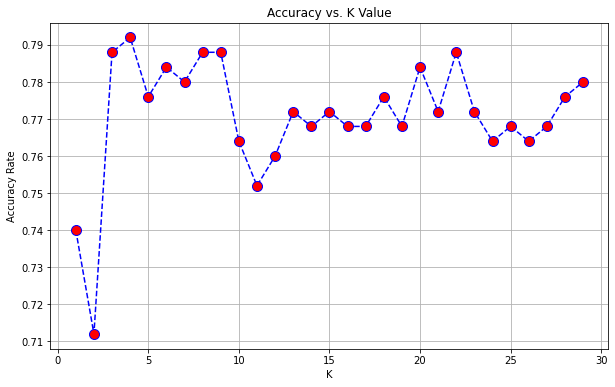

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

**Create the model again**

In [61]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print(f'Confusion Matrix:-\n {cm(ytest,ypred)}')
print(f'Accuracy:- {ac(ytest,ypred)}')
print(f'Classification report{cr(ytest,ypred)}')

Confusion Matrix:-
 [[141  17]
 [ 37 105]]
Accuracy:- 0.82
Classification report              precision    recall  f1-score   support

           0       0.79      0.89      0.84       158
           1       0.86      0.74      0.80       142

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



**Get the confusion matrix , accuracy score and classification report**

Confusion Matrix:-
[[108  23]
 [ 29  90]]

Accuracy: 0.792
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       131
           1       0.80      0.76      0.78       119

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



**Get the Mean accuracy with cross val score**

In [80]:
cvs=cross_val_score(KNeighborsClassifier(n_neighbors=8),xtrain,ytrain,cv=6,scoring='accuracy')
print(f'Accuracy: {cvs.mean()*100}')
print(f'Standard Deviation: {cvs.std()}')

Accuracy: 80.71765399351607
Standard Deviation: 0.038975541917816096


In [81]:
#given accuracy in file
#Accuracy: 80.254592
#Standard Deviation: 3.926876